<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,92.916146,0.005167,102.921313,102.916892,0.004421
1,0.0,1.0,67.259982,0.002197,77.262179,77.260947,0.001232
2,0.0,2.0,75.400299,-0.004872,85.395427,85.401194,-0.005768
3,0.0,3.0,54.995992,0.007990,65.003982,64.997062,0.006920
4,0.0,4.0,26.935567,-0.016730,36.918836,36.936876,-0.018040
...,...,...,...,...,...,...,...
119995,999.0,115.0,40.930603,0.026600,50.957203,50.929598,0.027604
119996,999.0,116.0,29.435305,-0.019173,39.416133,39.434044,-0.017911
119997,999.0,117.0,45.729069,0.014029,55.743097,55.728171,0.014926
119998,999.0,118.0,90.024437,0.002007,100.026443,100.024529,0.001915


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,92.916146,0.005167,102.921313,102.916892,0.004421
1,0.0,1.0,67.259982,0.002197,77.262179,77.260947,0.001232
2,0.0,2.0,75.400299,-0.004872,85.395427,85.401194,-0.005768
3,0.0,3.0,54.995992,0.007990,65.003982,64.997062,0.006920
4,0.0,4.0,26.935567,-0.016730,36.918836,36.936876,-0.018040
...,...,...,...,...,...,...,...
119995,999.0,115.0,40.930603,0.026600,50.957203,50.929598,0.027604
119996,999.0,116.0,29.435305,-0.019173,39.416133,39.434044,-0.017911
119997,999.0,117.0,45.729069,0.014029,55.743097,55.728171,0.014926
119998,999.0,118.0,90.024437,0.002007,100.026443,100.024529,0.001915


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    92.916146  0.005167  102.921313  102.916892  0.004421
      1.0    67.259982  0.002197   77.262179   77.260947  0.001232
      2.0    75.400299 -0.004872   85.395427   85.401194 -0.005768
      3.0    54.995992  0.007990   65.003982   64.997062  0.006920
      4.0    26.935567 -0.016730   36.918836   36.936876 -0.018040
...                ...       ...         ...         ...       ...
999.0 115.0  40.930603  0.026600   50.957203   50.929598  0.027604
      116.0  29.435305 -0.019173   39.416133   39.434044 -0.017911
      117.0  45.729069  0.014029   55.743097   55.728171  0.014926
      118.0  90.024437  0.002007  100.026443  100.024529  0.001915
      119.0  29.300173 -0.006444   39.293729   39.298908 -0.005179

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    92.916146  0.005167  102.921313  102.916892  0.004421
      1.0    67.259982  0.002197   77.262179   77.260947  0.001232
      2.0    75.400299 -0.004872   85.395427   85.401194 -0.005768
      3.0    54.995992  0.007990   65.003982   64.997062  0.006920
      4.0    26.935567 -0.016730   36.918836   36.936876 -0.018040
...                ...       ...         ...         ...       ...
999.0 115.0  40.930603  0.026600   50.957203   50.929598  0.027604
      116.0  29.435305 -0.019173   39.416133   39.434044 -0.017911
      117.0  45.729069  0.014029   55.743097   55.728171  0.014926
      118.0  90.024437  0.002007  100.026443  100.024529  0.001915
      119.0  29.300173 -0.006444   39.293729   39.298908 -0.005179

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,92.916146,0.005167,102.921313,102.916892,0.004421
1,0.0,1.0,67.259982,0.002197,77.262179,77.260947,0.001232
2,0.0,2.0,75.400299,-0.004872,85.395427,85.401194,-0.005768
3,0.0,3.0,54.995992,0.007990,65.003982,64.997062,0.006920
4,0.0,4.0,26.935567,-0.016730,36.918836,36.936876,-0.018040
...,...,...,...,...,...,...,...
119995,999.0,115.0,40.930603,0.026600,50.957203,50.929598,0.027604
119996,999.0,116.0,29.435305,-0.019173,39.416133,39.434044,-0.017911
119997,999.0,117.0,45.729069,0.014029,55.743097,55.728171,0.014926
119998,999.0,118.0,90.024437,0.002007,100.026443,100.024529,0.001915


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    92.916146  0.005167  102.921313  102.916892  0.004421
      1.0    67.259982  0.002197   77.262179   77.260947  0.001232
      2.0    75.400299 -0.004872   85.395427   85.401194 -0.005768
      3.0    54.995992  0.007990   65.003982   64.997062  0.006920
      4.0    26.935567 -0.016730   36.918836   36.936876 -0.018040
...                ...       ...         ...         ...       ...
999.0 115.0  40.930603  0.026600   50.957203   50.929598  0.027604
      116.0  29.435305 -0.019173   39.416133   39.434044 -0.017911
      117.0  45.729069  0.014029   55.743097   55.728171  0.014926
      118.0  90.024437  0.002007  100.026443  100.024529  0.001915
      119.0  29.300173 -0.006444   39.293729   39.298908 -0.005179

[120000 rows x 5 columns]

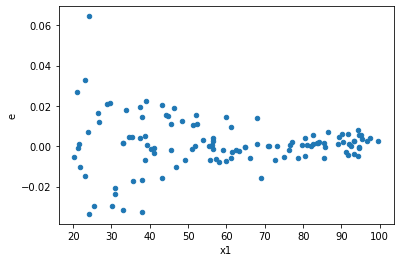

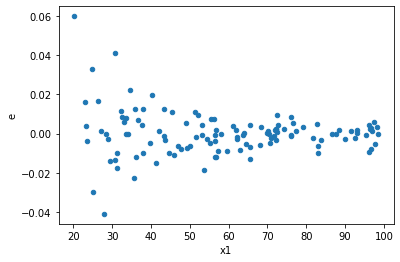

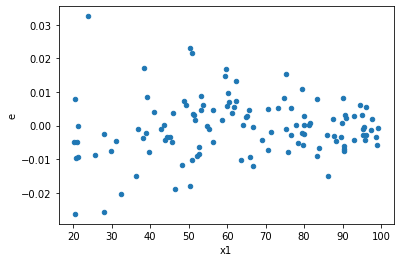

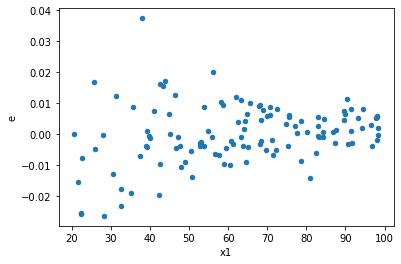

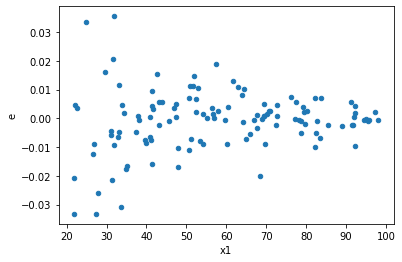

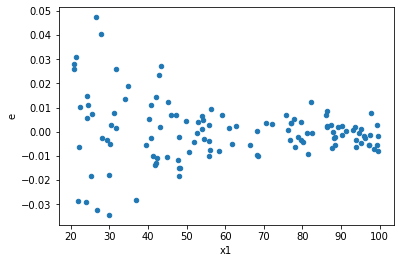

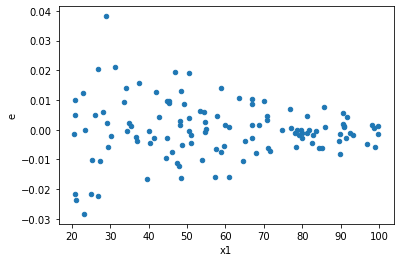

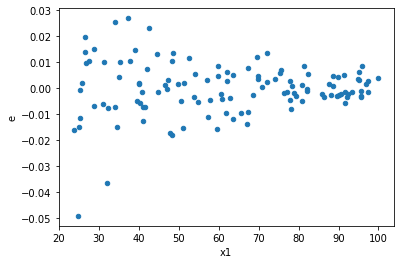

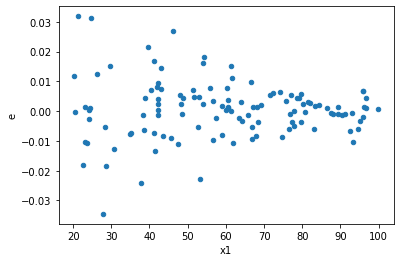

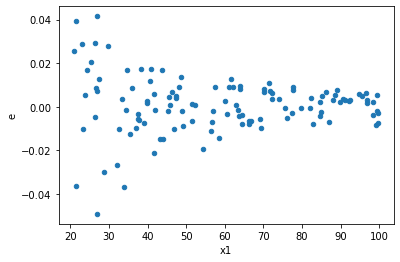

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,0.009754576588163722,0.0012165157588218294,0.0002075441827268877,2.5883314017485733e-05,0.12471230789227274,4.679549352027414e-11,Reject005=0 : Heteroscedasticity
1.0,47.0,47.0,0.006959831998787379,0.0010945391575397864,0.00014808153188909317,2.3288067181697584e-05,0.1572651692929498,3.0319011575450806e-09,Reject005=0 : Heteroscedasticity
2.0,47.0,47.0,0.006251468298489206,0.0019329511695383155,0.00013300996379764267,4.11266206284748e-05,0.309199547569561,9.780914146397625e-05,Reject005=0 : Heteroscedasticity
3.0,47.0,47.0,0.012553568717949389,0.0008508993821155651,0.0002670972067648806,1.8104242172671597e-05,0.06778147323947246,2.8884706102123437e-16,Reject005=0 : Heteroscedasticity
4.0,47.0,47.0,0.00828487453669213,0.001592599627474741,0.0001762739263125985,3.3885098456909385e-05,0.19222978216766243,8.954217352989811e-08,Reject005=0 : Heteroscedasticity
5.0,47.0,47.0,0.00845860894611335,0.0011710160611989213,0.0001799704031087947,2.49152353446579e-05,0.13844073755614295,3.160388980991189e-10,Reject005=0 : Heteroscedasticity
6.0,47.0,47.0,0.007558459500323589,0.0009091878334897999,0.00016081828724092743,1.9344421989144677e-05,0.12028745188763347,2.3895682995728396e-11,Reject005=0 : Heteroscedasticity
7.0,47.0,47.0,0.009832384368355023,0.001545664484873045,0.000209199667411809,3.288647840155415e-05,0.1572013895070741,3.0105603767048185e-09,Reject005=0 : Heteroscedasticity
8.0,47.0,47.0,0.009526537381903987,0.0009841999290326985,0.00020269228472136143,2.094042402197231e-05,0.10331140156991594,1.3282320289916324e-12,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64